SIN-392 - Introduction to Digital Image Processing (2023-1)

# Lecture 12 - Mathematical morphology II

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the libraries
---

In [1]:
import numpy as np

from scipy import ndimage
from skimage import img_as_float, filters, morphology, data

import matplotlib.pyplot as plt
### %matplotlib notebook

## Creating a simple binary image

In [2]:
img_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

img_1 = img_1.astype(bool)

In [3]:
img_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 0, 1, 1, 0, 0],
                  [0, 0, 0, 1, 1, 0, 0, 0],
                  [0, 0, 0, 1, 1, 0, 0, 0],
                  [0, 1, 0, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

img_2 = img_2.astype(bool)

In [4]:
img_3 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 0, 0, 1, 0, 0],
                  [0, 1, 0, 1, 0, 1, 1, 0],
                  [0, 0, 0, 1, 0, 1, 0, 0],
                  [0, 1, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]], dtype=bool)

img_3 = img_3.astype(bool)

Hit or Miss Transformation
----
* Set two structuring elements, one for 1's and one for the 0's.
* The EE used to detect 1's have 1 in the position where we expect 1's
* The EE used to detect 0's has 1 in the position where we expect 0's.
* Positions with 0's in booth EEs are considered "don't care". That is, it doesn't matter if there were 1's or 0's.

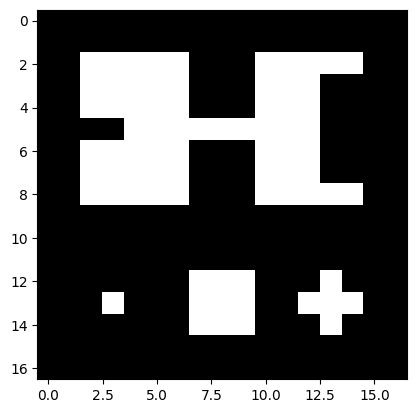

In [5]:
img = img_1

# Plot the image
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

### Detecting 3x3 squares that are NOT part of a larger connected component.

In [6]:
# Structuring elements to detect square objects with size 3x3
#     that are NOT part of any larger connected component.
ee_hit_1 = np.array([[0, 0, 0, 0, 0],
                     [0, 1, 1, 1, 0],
                     [0, 1, 1, 1, 0],
                     [0, 1, 1, 1, 0],
                     [0, 0, 0, 0, 0]])

ee_miss_1 = np.array([[1, 1, 1, 1, 1],
                      [1, 0, 0, 0, 1],
                      [1, 0, 0, 0, 1],
                      [1, 0, 0, 0, 1],
                      [1, 1, 1, 1, 1]])

In [7]:
img_hit_miss_1 = np.logical_and(morphology.binary_erosion(img, ee_hit_1), 
                                morphology.binary_erosion(~img, ee_miss_1))

### Detecting 3x3 squares that MAY be part of a larger connected component.

In [8]:
# Structuring elements to detect square objects with size 3x3 
#     that MAY be part of no larger connected component.
ee_hit_2 = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])

ee_miss_2 = np.array([[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 0]])                      

In [9]:
img_hit_miss_2 = np.logical_and(morphology.binary_erosion(img, ee_hit_2), 
                                morphology.binary_erosion(~img, ee_miss_2))

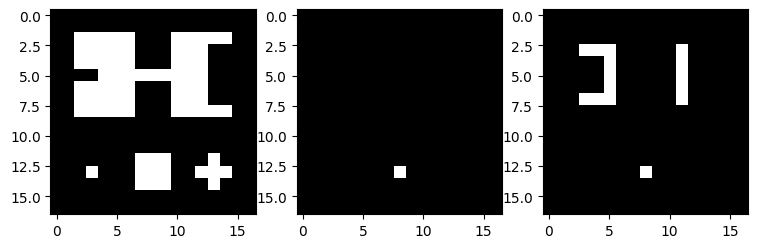

In [10]:
plt.figure(figsize=(9, 5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_hit_miss_1, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_hit_miss_2, cmap='gray')

plt.show()

### Corner detection using the Hit-or-Miss Transform

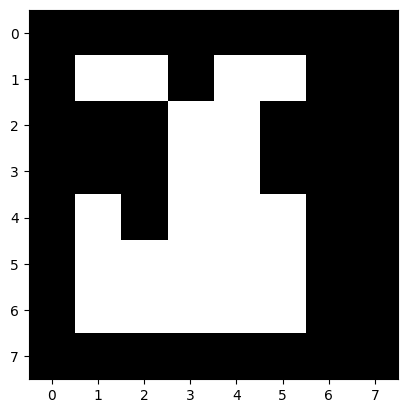

In [11]:
img = img_2

# Plot the image
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

In [12]:
ee_sup_esq_one = np.array([[0, 0, 0],
                           [0, 1, 1],
                           [0, 1, 0]])
ee_sup_esq_zero =  np.array([[1, 1, 0],
                             [1, 0, 0],
                             [0, 0, 0]])

ee_inf_esq_one =  np.array([[0, 1, 0],
                            [0, 1, 1],
                            [0, 0, 0]])
ee_inf_esq_zero =  np.array([[0, 0, 0],
                             [1, 0, 0],
                             [1, 1, 0]])

ee_sup_dir_one =  np.array([[0, 0, 0],
                            [1, 1, 0],
                            [0, 1, 0]])
ee_sup_dir_zero =  np.array([[0, 1, 1],
                             [0, 0, 1],
                             [0, 0, 0]])

ee_inf_dir_one =  np.array([[0, 1, 0],
                            [1, 1, 0],
                            [0, 0, 0]])
ee_inf_dir_zero =  np.array([[0, 0, 0],
                             [0, 0, 1],
                             [0, 1, 1]])

ee_one_list = [ee_sup_esq_one, ee_inf_esq_one, ee_sup_dir_one, ee_inf_dir_one]
ee_zero_list = [ee_sup_esq_zero, ee_inf_esq_zero, ee_sup_dir_zero, ee_inf_dir_zero]

#### Implementation of the Hit-or-miss Transform from scratch

In [13]:
img_hit_miss_list = []

img_hit_miss = np.zeros(img.shape)

for ee_one, ee_zero in zip(ee_one_list, ee_zero_list):
    img_hit_miss_temp = np.logical_and(morphology.binary_erosion(img, ee_one), 
                                       morphology.binary_erosion(~img, ee_zero))
    img_hit_miss_list.append(img_hit_miss_temp)
    
    img_hit_miss = np.logical_or(img_hit_miss, img_hit_miss_temp)

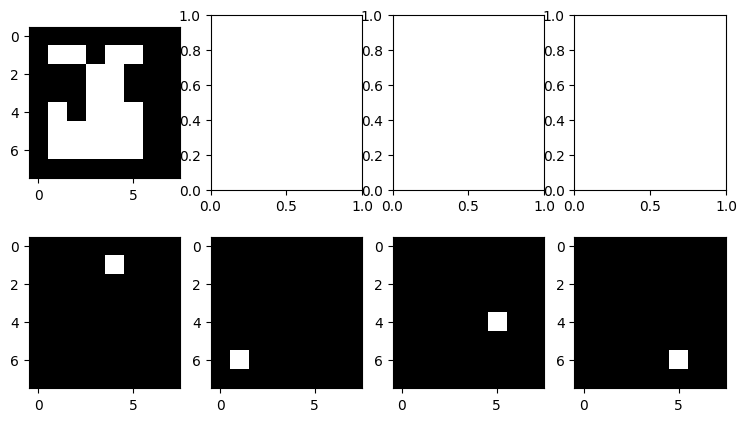

In [14]:
fig, ax  = plt.subplots(2, 4, figsize=(9,5))

img_ = ax[0,0].imshow(img, cmap='gray')

for i, img_hit_miss_temp in enumerate(img_hit_miss_list):
    img_ = ax[1,i].imshow(img_hit_miss_temp, cmap='gray')
    
plt.show()

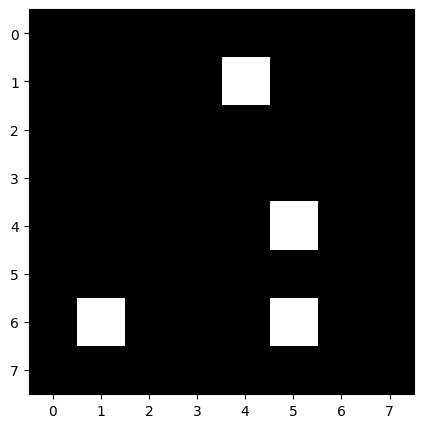

In [15]:
plt.figure(figsize=(9,5))
plt.imshow(img_hit_miss, cmap='gray')

plt.show()

#### Implementation of the Hit-or-miss Transform in the SciPy library

In [16]:
img_hit_miss_list = []

img_hit_miss = np.zeros(img.shape)

for ee_one, ee_zero in zip(ee_one_list, ee_zero_list):
    img_hit_miss_temp = ndimage.binary_hit_or_miss(img, ee_one, ee_zero)
    
    img_hit_miss_list.append(img_hit_miss_temp)
    
    img_hit_miss = np.logical_or(img_hit_miss, img_hit_miss_temp)

##### Plotando as imagens

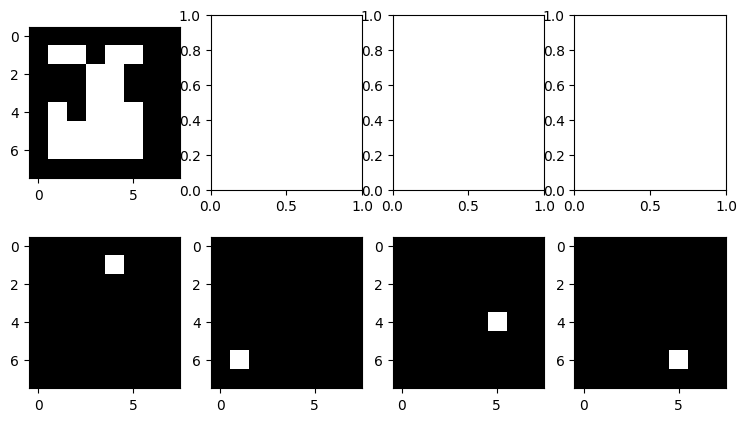

In [17]:
fig, ax  = plt.subplots(2, 4, figsize=(9,5))

img_ = ax[0,0].imshow(img, cmap='gray')

for i, img_hit_miss_temp in enumerate(img_hit_miss_list):
    img_ = ax[1,i].imshow(img_hit_miss_temp, cmap='gray')
    
plt.show()

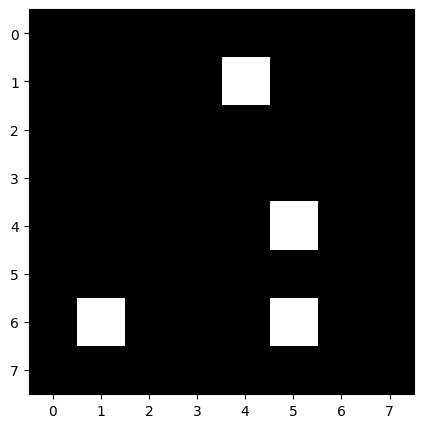

In [18]:
plt.figure(figsize=(9,5))
plt.imshow(img_hit_miss, cmap='gray')

plt.show()

### Extreme point detection using the Hit-or-Miss transform

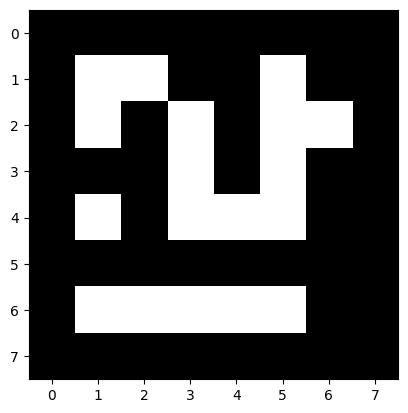

In [19]:
img = img_3

# Plot the image
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

In [20]:
ee_up_one = np.array([[0, 0, 0],
                      [0, 1, 0],
                      [0, 0, 0]])
ee_up_zero =  np.array([[0, 1, 0],
                        [1, 0, 1],
                        [0, 0, 0]])

ee_down_one =  np.array([[0, 0, 0],
                         [0, 1, 0],
                         [0, 0, 0]])
ee_down_zero =  np.array([[0, 0, 0],
                          [1, 0, 1],
                          [0, 1, 0]])

ee_left_one =  np.array([[0, 0, 0],
                         [0, 1, 0],
                         [0, 0, 0]])
ee_left_zero =  np.array([[0, 1, 0],
                          [1, 0, 0],
                          [0, 1, 0]])

ee_right_one =  np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]])
ee_right_zero =  np.array([[0, 1, 0],
                           [0, 0, 1],
                           [0, 1, 0]])

ee_one_list = [ee_up_one, ee_down_one, ee_left_one, ee_right_one]
ee_zero_list = [ee_up_zero, ee_down_zero, ee_left_zero, ee_right_zero]

### Implementation of the Hit-or-miss Transform from scratch

In [21]:
img_hit_miss_list = []

img_hit_miss = np.zeros(img.shape)

for ee_one, ee_zero in zip(ee_one_list, ee_zero_list):
    img_hit_miss_temp = np.logical_and(morphology.binary_erosion(img, ee_one), 
                                       morphology.binary_erosion(~img, ee_zero))
    img_hit_miss_list.append(img_hit_miss_temp)
    img_hit_miss = np.logical_or(img_hit_miss, img_hit_miss_temp)

#### Plotting the images

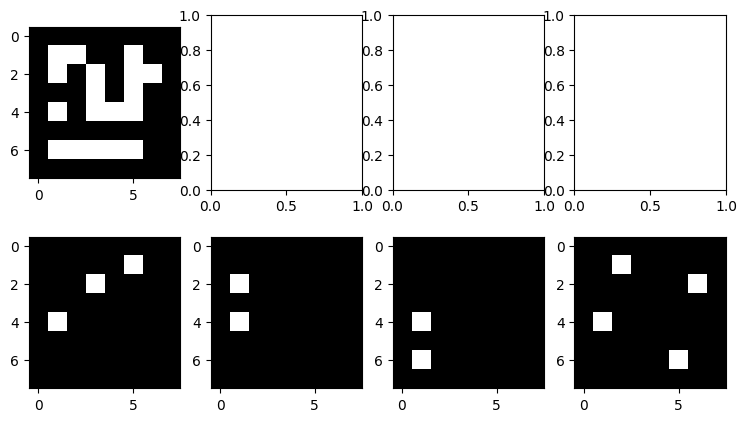

In [22]:
fig, ax  = plt.subplots(2, 4, figsize=(9,5))

img_ = ax[0,0].imshow(img, cmap='gray')

for i, img_hit_miss_temp in enumerate(img_hit_miss_list):
    img_ = ax[1,i].imshow(img_hit_miss_temp, cmap='gray')
    
plt.show()

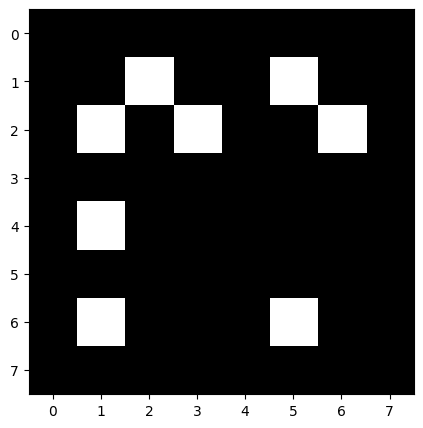

In [23]:
plt.figure(figsize=(9,5))
plt.imshow(img_hit_miss, cmap='gray')

plt.show()

## Bibliography
---

* GONZALEZ, R.C.; WOODS, R.E.; Digital Image Processing. 3rd edition. Pearson, 2009.
* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * In Brazilian Portuguese.
    * Available for download on the author's website (Personal use only).
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * In Brazilian Portuguese.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  
* Prof. Aldo von Wangenheim. Morfologia Matemática
    * http://www.inf.ufsc.br/~visao/morfologia.pdf
* Prof. James Facon. A Morfologia Matemática e suas Aplicações em Processamento de Imagens - Minicurso – WVC 2011
    * http://www.ppgia.pucpr.br/~facon/Books/2011WVCMinicurso2Morfo.pdf 
* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
* The USC-SIPI Image Database.    
    * http://sipi.usc.edu/database/database.php
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* scikit-image. Documentação. Module 'morphology'. 
    * https://scikit-image.org/docs/dev/api/skimage.morphology.html
* Morphological Filtering 
    * https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html
* OpenCV. Hit-or-Miss.
    * https://docs.opencv.org/3.4/db/d06/tutorial_hitOrMiss.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/